In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
file_path = "Mall_Customers.csv" 
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
df_selected = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [14]:
df_selected.dropna(inplace=True)


C:\Users\vatch\AppData\Local\Temp\ipykernel_6004\1225973394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)
print(df_scaled)

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]
 [-1.20926872 -1.66266033  1.00159627]
 [-0.27630176 -1.62449091 -1.71591298]
 [-1.13750203 -1.62449091  1.70038436]
 [ 1.80493225 -1.58632148 -1.83237767]
 [-0.6351352  -1.58632148  0.84631002]
 [ 2.02023231 -1.58632148 -1.4053405 ]
 [-0.27630176 -1.58632148  1.89449216]
 [ 1.37433211 -1.54815205 -1.36651894]
 [-1.06573534 -1.54815205  1.04041783]
 [-0.13276838 -1.54815205 -1.44416206]
 [-1.20926872 -1.54815205  1.11806095]
 [-0.27630176 -1.50998262 -0.59008772]
 [-1.3528021  -1.50998262  0.61338066]
 [ 0.94373197 -1.43364376 -0.82301709]
 [-0.27630176 -1.43364376  1.8556706 ]
 [-0.27630176 -1.39547433 -0.59008772]
 [-0.99396865 -1.39547433  0.88513158]
 [ 0.51313183 -1.3573049  -1.75473454]
 [-0.56336851 -1.3573049   0.88513158]
 [ 1.08726535 -1.24279661 -1.4053405 ]
 [-0.70690189 -1.24279661

In [16]:
silhouette_scores = {}
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores[k] = silhouette_score(df_scaled, cluster_labels)


In [20]:
best_k = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_k]
print(best_score)
print(best_k)

0.41664341513732767
5


In [21]:
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_selected['Cluster'] = kmeans_best.fit_predict(df_scaled)

C:\Users\vatch\AppData\Local\Temp\ipykernel_6004\3533058335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = kmeans_best.fit_predict(df_scaled)


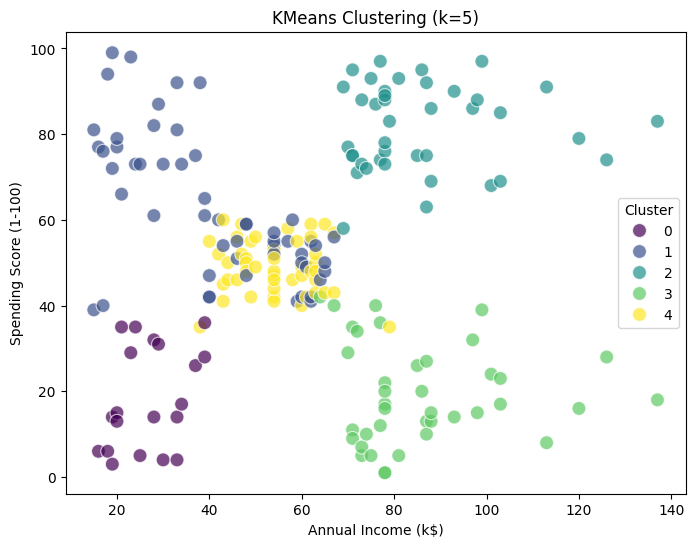

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_selected['Annual Income (k$)'],
    y=df_selected['Spending Score (1-100)'],
    hue=df_selected['Cluster'],
    palette='viridis',
    s=100,
    alpha=0.7
)
plt.title(f'KMeans Clustering (k={best_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [23]:
print(f"Best Number of Clusters: {best_k}")
print(f"Best Silhouette Score: {best_score:.4f}")


Best Number of Clusters: 5
Best Silhouette Score: 0.4166
